# Separación y distribución del set de datos
Ahora que tenemos completo el set de datos que vamos a trabajar lo separamos en test, train y validation

In [45]:
#!pip install scikit-learn

In [46]:
import os
import shutil
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [47]:
images_folder = 'datasets/undersampled_final_output_augmentation/images'
labels_folder = 'datasets/undersampled_final_output_augmentation/labels'

In [48]:
images = [os.path.join(images_folder, img) for img in os.listdir(images_folder) if img.endswith('.jpg')]
labels = [os.path.join(labels_folder, img.replace('.jpg', '.txt')) for img in os.listdir(images_folder) if img.endswith('.jpg')]

In [49]:
def read_label_file(label_file):
    with open(label_file, 'r') as f:
        class_name = f.readline().split()[0]
    return class_name

In [50]:
class_labels = [read_label_file(label) for label in labels]

images_train, images_temp, labels_train, labels_temp = train_test_split(
    images, labels, test_size=0.3, stratify=class_labels, random_state=42
)

images_val, images_test, labels_val, labels_test = train_test_split(
    images_temp, labels_temp, test_size=0.5, stratify=[read_label_file(label) for label in labels_temp], random_state=42
)

In [51]:
def move_files(image_paths, label_paths, dest_img_folder, dest_label_folder):
    if not os.path.exists(dest_img_folder):
        os.makedirs(dest_img_folder)
    if not os.path.exists(dest_label_folder):
        os.makedirs(dest_label_folder)

    for img_path, label_path in zip(image_paths, label_paths):
        shutil.copy(img_path, os.path.join(dest_img_folder, os.path.basename(img_path)))
        shutil.copy(label_path, os.path.join(dest_label_folder, os.path.basename(label_path)))


In [52]:
train_img_folder = 'datasets/split_dataset/train/images'
train_label_folder = 'datasets/split_dataset/train/labels'
val_img_folder = 'datasets/split_dataset/val/images'
val_label_folder = 'datasets/split_dataset/val/labels'
test_img_folder = 'datasets/split_dataset/test/images'
test_label_folder = 'datasets/split_dataset/test/labels'

In [53]:
move_files(images_train, labels_train, train_img_folder, train_label_folder)
move_files(images_val, labels_val, val_img_folder, val_label_folder)
move_files(images_test, labels_test, test_img_folder, test_label_folder)

print(f"Train set size: {len(images_train)}")
print(f"Validation set size: {len(images_val)}")
print(f"Test set size: {len(images_test)}")

Train set size: 8164
Validation set size: 1750
Test set size: 1750


In [54]:
def read_label_file(label_file):
    labels = []
    with open(label_file, 'r') as f:
        for line in f.readlines():
            class_name = line.split()[0]
            labels.append(class_name.strip())
    return labels

def count_labels(labels_folder):
    label_count = Counter()
    for label_file in os.listdir(labels_folder):
        if label_file.endswith('.txt'):
            label_path = os.path.join(labels_folder, label_file)
            labels = read_label_file(label_path)
            label_count.update(labels)
    return label_count

train_labels_count = count_labels(train_label_folder)
val_labels_count = count_labels(val_label_folder)
test_labels_count = count_labels(test_label_folder)

data = pd.DataFrame({
    'Train': train_labels_count,
    'Validation': val_labels_count,
    'Test': test_labels_count
}).fillna(0)

data = data.T

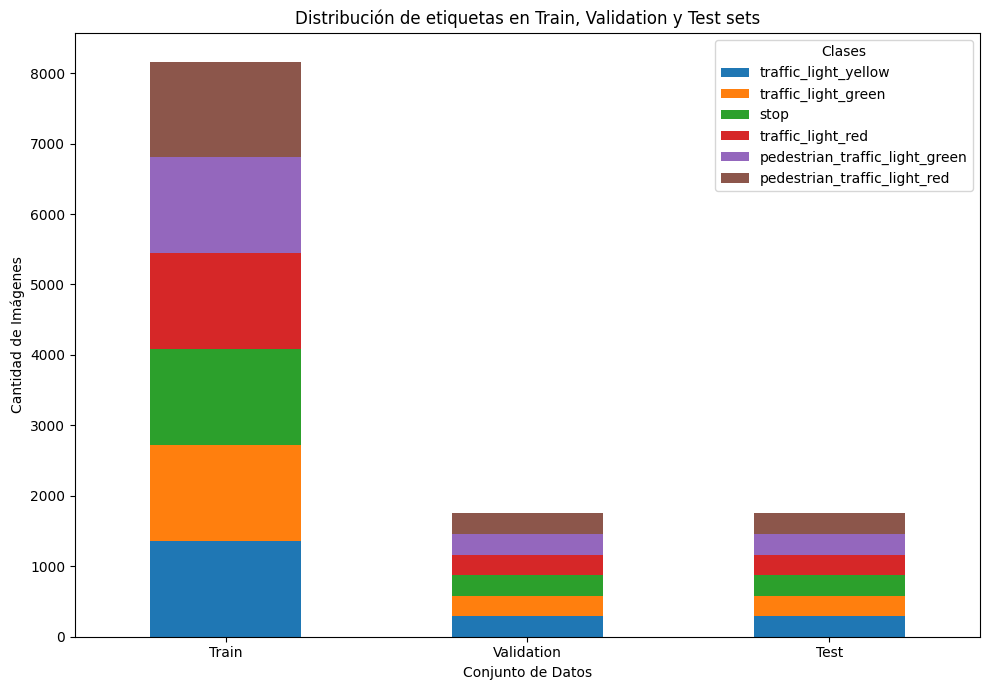

In [55]:
# Crear gráfico apilado
data.plot(kind='bar', stacked=True, figsize=(10, 7))

plt.title('Distribución de etiquetas en Train, Validation y Test sets')
plt.xlabel('Conjunto de Datos')
plt.ylabel('Cantidad de Imágenes')
plt.xticks(rotation=0)
plt.legend(title="Clases")
plt.tight_layout()

plt.show()

La distribución de los conjuntos de `Train`, `Validation`, y `Test` en este gráfico sigue la estrategia típica de división de datos para entrenar modelos de aprendizaje automático. En este caso, el 70% de las imágenes del conjunto de datos original se destinaron al conjunto de entrenamiento (`Train`), mientras que el restante 30% se dividió equitativamente entre los conjuntos de validación (`Validation`) y prueba (`Test`), con un 15% para cada uno.

- **Conjunto de entrenamiento (Train)**: Representa el mayor bloque, con alrededor del 70% del total de datos, asegurando que el modelo tenga suficientes ejemplos para aprender patrones de las diferentes clases. Este conjunto es crucial para ajustar los parámetros del modelo.

- **Conjuntos de validación (Validation)**: Compuesto por aproximadamente el 15% de los datos, este bloque se utiliza durante el proceso de entrenamiento para ajustar los hiperparámetros y evaluar el rendimiento del modelo antes de la fase final de prueba. Ayuda a prevenir el sobreajuste, asegurando que el modelo generalice bien a datos no vistos.

- **Conjunto de prueba (Test)**: También representa el 15% del total y se utiliza para evaluar el rendimiento final del modelo después del entrenamiento. No se emplea durante la fase de ajuste del modelo y permite medir su capacidad de generalización en condiciones reales.

Este tipo de distribución es balanceada, permitiendo tanto un entrenamiento sólido como evaluaciones confiables del modelo, con una distribución equitativa de las clases en cada conjunto gracias a la técnica de estratificación.